# Housing Prices Competition for Kaggle Learn Users

### Uvod

V tej nalogi bomo raziskovali podatke o cenah nepremičnin in razvili model za napovedovanje cen hiš. Glavni cilj je ustvariti natančne napovedi za nove hiše, ki prihajajo na trg, na podlagi značilnosti, kot so velikost parcele, leto gradnje, število sob in druge pomembne spremenljivke. 

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

In [17]:
train_df = pd.read_csv("./Podatki/train.csv")
test_df = pd.read_csv("./Podatki/test.csv")

### Eksplorativna Analiza Podatkov (EDA)

Eksploratorna analiza podatkov (EDA) je ključni korak v procesu analize podatkov, ki omogoča boljše razumevanje strukture, značilnosti in vzorcev v podatkih. Cilj EDA je identificirati pomembne spremenljivke, odkriti morebitne anomalije, preveriti porazdelitve podatkov in raziskati odnose med spremenljivkami. V tej fazi bomo uporabili različne vizualizacijske tehnike in statistične metode za analizo podatkov, ki so na voljo v učnem naboru (`train_df`) in testnem naboru (`test_df`). To nam bo pomagalo pri pripravi podatkov za modeliranje in izboljšanju natančnosti napovedi.

In [18]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [20]:
print(train_df.shape, test_df.shape)

(1460, 81) (1459, 80)


In [ ]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


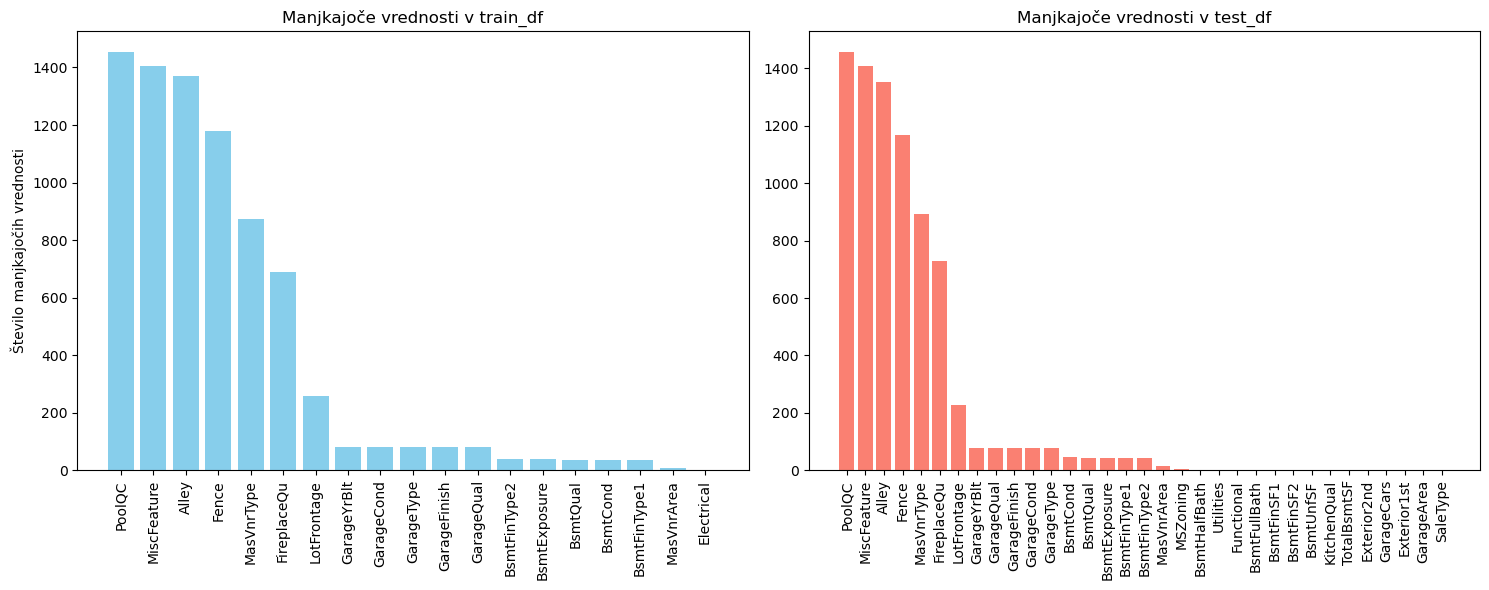

In [22]:
missing_train = train_df.isnull().sum().sort_values(ascending=False)
missing_test = test_df.isnull().sum().sort_values(ascending=False)

missing_train = missing_train[missing_train > 0]
missing_test= missing_test[missing_test > 0]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].bar(missing_train.index, missing_train.values, color='skyblue')
axes[0].set_title("Manjkajoče vrednosti v train_df")
axes[0].set_ylabel("Število manjkajočih vrednosti")
axes[0].tick_params(axis='x', rotation=90)

axes[1].bar(missing_test.index, missing_test.values, color='salmon')
axes[1].set_title("Manjkajoče vrednosti v test_df")
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

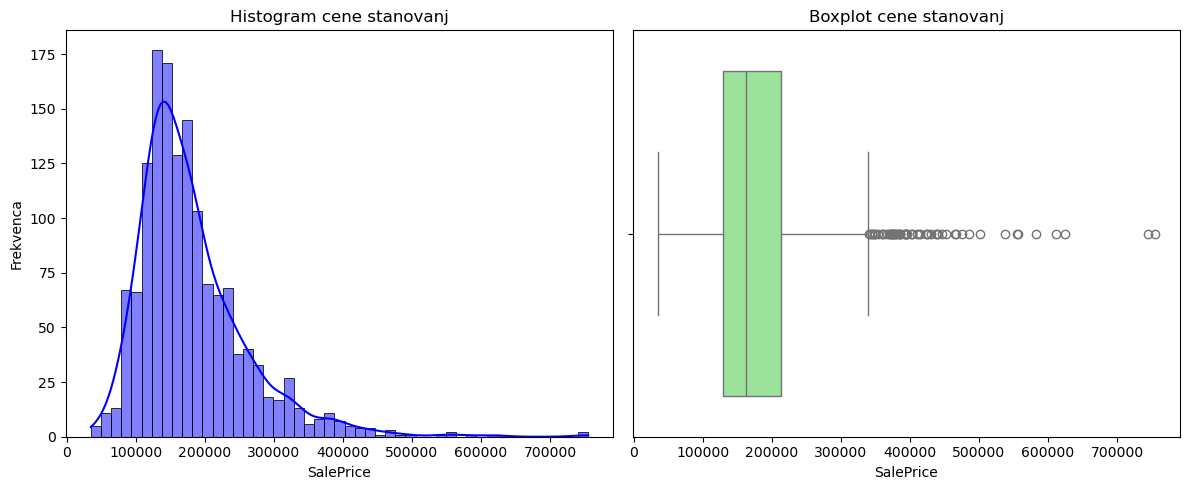

In [23]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(train_df['SalePrice'], kde=True, color="blue")
plt.title('Histogram cene stanovanj')
plt.xlabel('SalePrice')
plt.ylabel('Frekvenca')


plt.subplot(1, 2, 2)
sns.boxplot(x=train_df['SalePrice'], color='lightgreen')
plt.title('Boxplot cene stanovanj')
plt.xlabel('SalePrice')
plt.tight_layout()
plt.show()

Vidimo, da porazdelitev ni normalna.

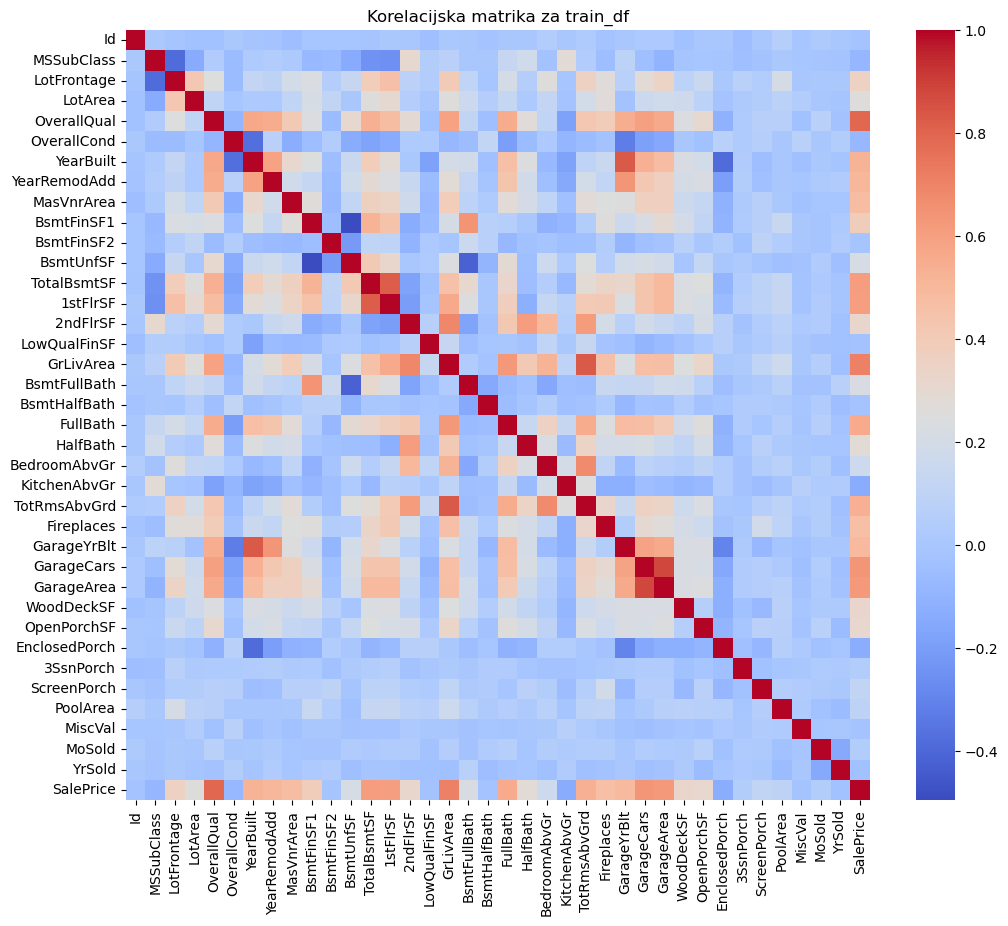

In [29]:
# samo za numerične spremenljivke
numeric_train_df = train_df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_train_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title("Korelacijska matrika za train_df")
plt.show()

Vidimo, da na ceno vplivajo najbolj:
* OverallQual (vse skupna kvaliteta),
* GrLivArea (stanovanjska površina nad nivojem tal), 
* GarageCars (velikost garaže glede na kapaciteto avtov), 
* FullBath (Popolne kopalnice v bivalnem delu hiše (nad tlemi)), 
* MasVnrArea (površina opečne (ali kamnite) fasadne obloge), 
* YearRemodAdd (datum prenove, enak datumu gradnje, če ni bilo prenove ali dozidave)
* ...

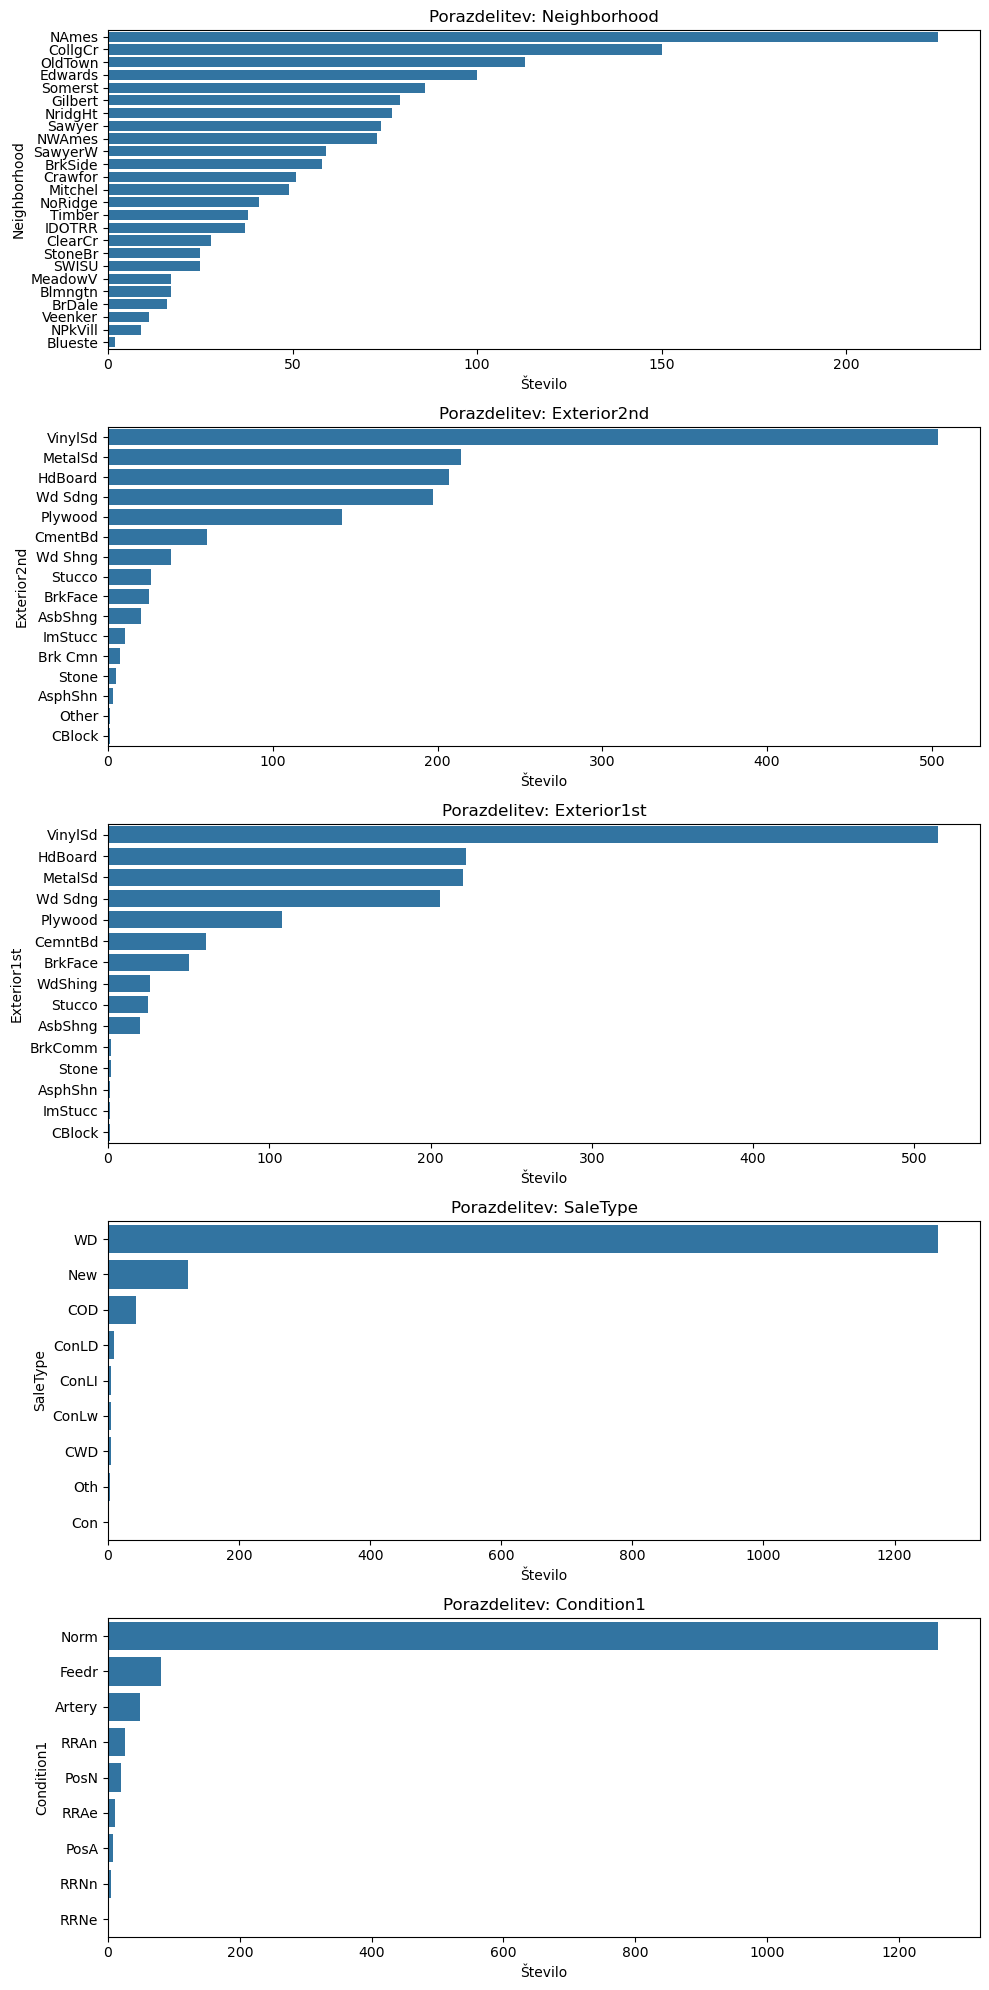

In [ ]:
categorical_features = train_df.select_dtypes(include=['object']).columns
unique_counts = train_df[categorical_features].nunique()


top_5_distributed_features = unique_counts.sort_values(ascending=False).head(5).index

fig, axes = plt.subplots(nrows=len(top_5_distributed_features), ncols=1, figsize=(10, len(top_5_distributed_features) * 4))

for i, feature in enumerate(top_5_distributed_features):
    sns.countplot(data=train_df, y=feature, order=train_df[feature].value_counts().index, ax=axes[i])
    axes[i].set_title(f"Raznolikost: {feature}")
    axes[i].set_xlabel("Število")
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()


### Pivot tabele za pregled vpliva kategorij na ceno

Za spremenljivke, kot so MSZoning, Street, BldgType, HouseStyle in podobno, lahko ustvarimo pivot tabele, ki združujejo ceno (na primer povprečno ceno) glede na nivoje kategorije. Tako lahko ugotovimo, kateri nivoji morda vplivajo na ceno.

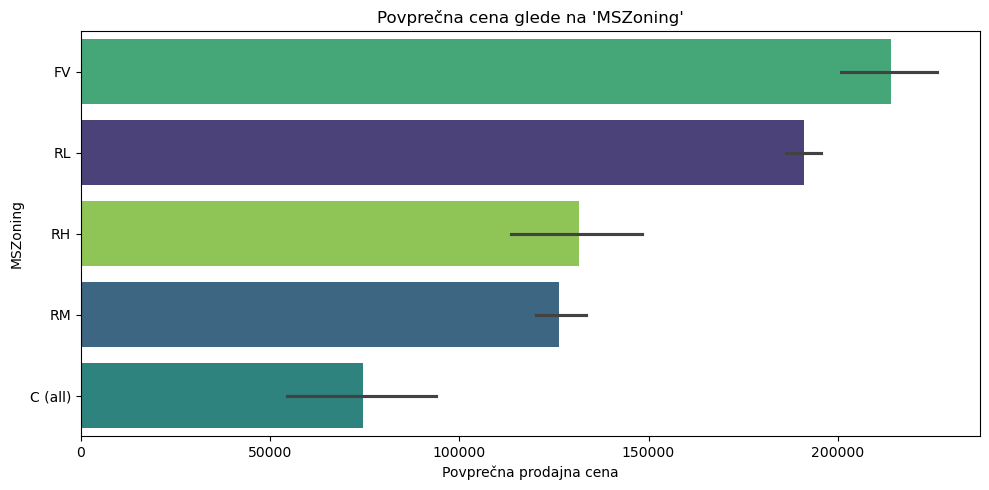

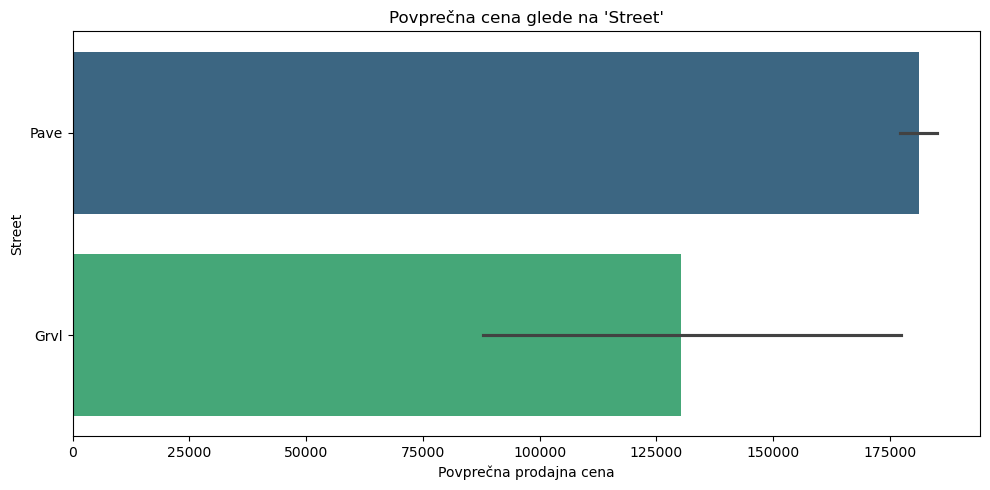

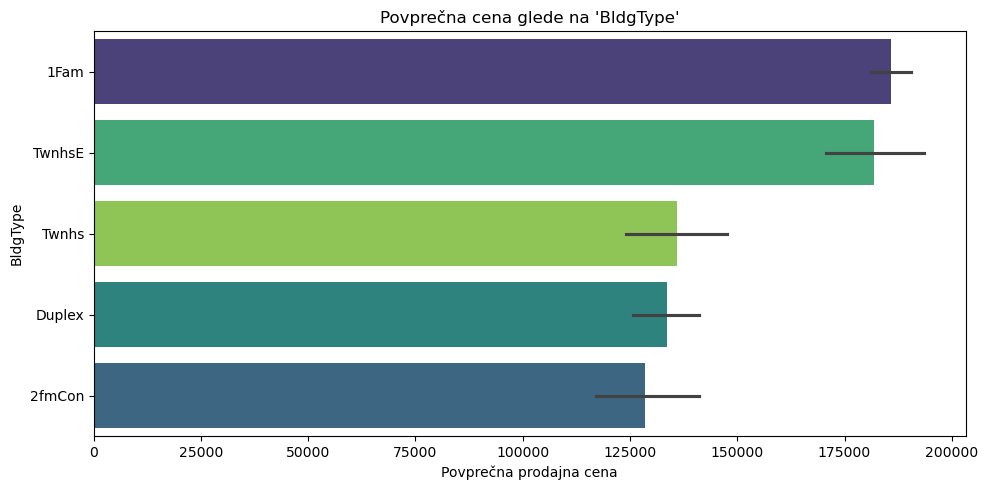

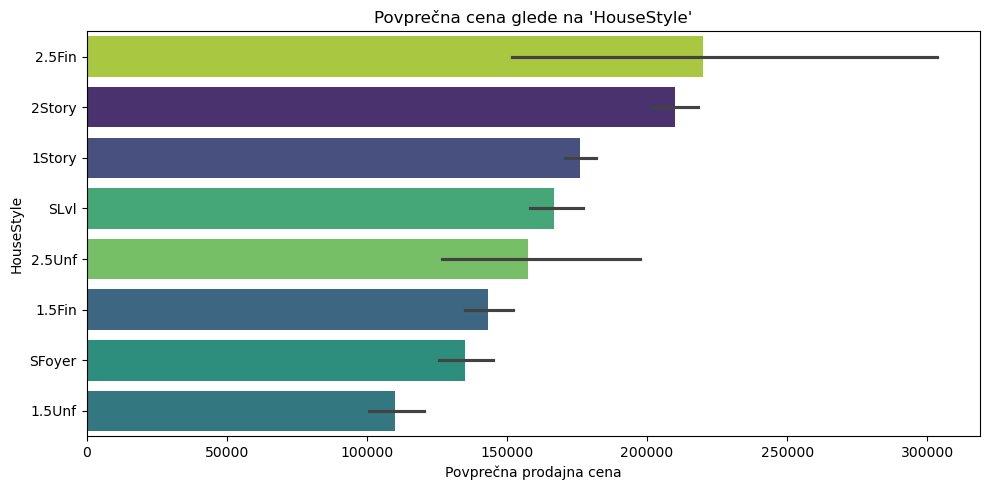

In [26]:
selected_features = ['MSZoning', 'Street', 'BldgType', 'HouseStyle']

for feature in selected_features:
    plt.figure(figsize=(10, 5))
    order = train_df.groupby(feature)['SalePrice'].mean().sort_values(ascending=False).index
    sns.barplot(data=train_df, x='SalePrice', y=feature, order=order, hue=feature, legend=False, palette='viridis')
    plt.title(f"Povprečna cena glede na '{feature}'")
    plt.xlabel("Povprečna prodajna cena")
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()


Kasneje bomo še objektnim spremenljivkam dodelili numerične vrednosti za ocene stanj kot .npr Ex=5, Gd=4,TA=3, Fa=2, NA=1/0. Izvedili bomo feature engineering kot (1stFlrSF + 2ndFlrSF = TotalSF). Uporabili druge porazdelitve za cene stanovanj (log transformacija?).

## Ustvarjanje modela

Ta del kode prikazuje zelo osnovno implementacijo modela `DecisionTreeRegressor` za napovedovanje cen nepremičnin. Uporabljene so bile osnovne značilnosti, kot so velikost parcele, leto gradnje, število sob itd., brez dodatne obdelave podatkov ali optimizacije modela. 

Čeprav je model preprost, lahko služi kot dobra izhodiščna točka za nadaljnje izboljšave kasneje.

In [27]:
y = train_df['SalePrice']

feature_names = ['LotArea', 'YearBuilt', '1stFlrSF' , '2ndFlrSF' , 'FullBath' , 'BedroomAbvGr', 'TotRmsAbvGrd']
X = train_df[feature_names]
X

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,8450,2003,856,854,2,3,8
1,9600,1976,1262,0,2,3,6
2,11250,2001,920,866,2,3,6
3,9550,1915,961,756,1,3,7
4,14260,2000,1145,1053,2,4,9
...,...,...,...,...,...,...,...
1455,7917,1999,953,694,2,3,7
1456,13175,1978,2073,0,2,3,7
1457,9042,1941,1188,1152,2,4,9
1458,9717,1950,1078,0,1,2,5


In [28]:
ames_model = DecisionTreeRegressor(random_state=1)
ames_model.fit(X, y)

predictions = ames_model.predict(X)
print(predictions)

mae = mean_absolute_error(y, predictions)
print("Mean Absolute Error:", mae)

[208500. 181500. 223500. ... 266500. 142125. 147500.]
Mean Absolute Error: 62.35433789954339
